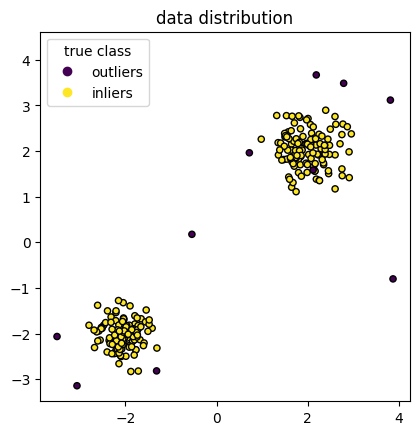

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

n_samples, n_outliers = 120, 10
rng = np.random.RandomState(0)
cluster_1 = 0.4 * rng.randn(n_samples, 2) + np.array([2, 2])
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])
outliers = rng.uniform(low=-4, high=4, size=(n_outliers, 2))

X = np.concatenate([cluster_1, cluster_2, outliers])
y = np.concatenate(
    [np.ones((2 * n_samples), dtype=int), -np.ones(n_outliers, dtype=int)]
)

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("data distribution")
plt.show()

In [2]:
# 通过y的比例进行均匀拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=0)
clf.fit(X_train)

# 得到score，Negative scores represent outliers, positive scores represent inliers
y_pre_score_test = clf.decision_function(cluster_1)
print(y_pre_score_test)

# -1为异常， 1为正常， 可以看下这个函数内部，就是score<0的设为-1
y_pre_label_test = clf.predict(cluster_1) 
print(y_pre_label_test)

[-0.00405924 -0.05483591 -0.0464454   0.06114685  0.0798991   0.00293274
  0.07265285  0.07739644  0.00998641  0.05202205 -0.07280995  0.03293431
 -0.08491398  0.07707053 -0.04180582  0.08524571 -0.05062859  0.06991123
  0.00243983  0.0618429  -0.0208317  -0.09156375  0.05918002  0.02240105
 -0.00441816  0.0587271   0.01961532  0.08308888  0.08680817  0.05852211
  0.05936301 -0.02740644  0.06540538 -0.00849776  0.06488082  0.07328782
  0.0095016   0.05925344  0.04274611  0.07231805  0.02018658  0.0156737
 -0.06377689  0.04419836  0.01116574  0.0243565   0.04947032  0.06658192
 -0.02233696  0.08618485 -0.05909443  0.00140032 -0.05313283  0.03747937
 -0.06807836 -0.0363295  -0.04408421  0.05193198  0.05993528  0.03765795
  0.04839431  0.02640429  0.06880401 -0.0386934   0.07324791  0.05980645
  0.07178556  0.05331439  0.06866646  0.04890657  0.02342538  0.07236389
 -0.06288944  0.02280176  0.00910907 -0.01576526  0.03469477  0.0504861
  0.01678723  0.02120959 -0.03796484  0.06149802  0.0

/tmp/ipykernel_1349188/3172550969.py:10: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(xx, yy, Z, camp=plt.cm.Blues_r)


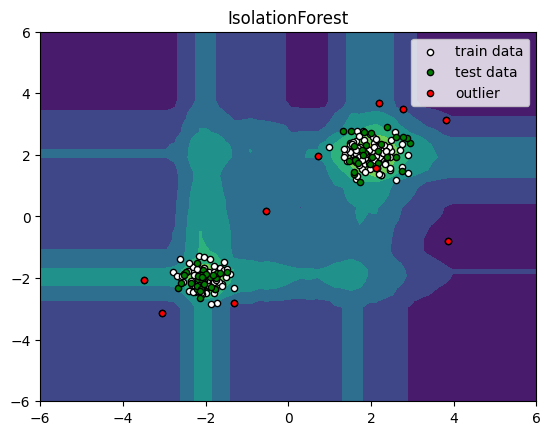

In [3]:
# 通过网格的方式得到location的x和y坐标
xx, yy = np.meshgrid(np.linspace(-6, 6, 60), np.linspace(-6, 6, 60))
# concat x和y 得到输入的坐标
input_location = np.c_[xx.ravel(), yy.ravel()]

Z = clf.decision_function(input_location)
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, camp=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k')
c = plt.scatter(outliers[:, 0], outliers[:, 1], c='red', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend([b1, b2, c],
           ["train data",
            "test data",
            "outlier"],
           loc="best")
plt.show()